In [ ]:
!unzip train.zip

In [2]:
import numpy as np
import keras

In [3]:
# load sample images from directory

def load_images(dir_path, color_info):

  from keras.utils import image_dataset_from_directory

  dataset = image_dataset_from_directory(
      directory=dir_path, labels=None,
      color_mode=color_info, image_size=(150, 200), pad_to_aspect_ratio=True
  )

  # convert tf dataset into numpy array
  numpy_data = []
  for batch in dataset:
      numpy_data.append(batch.numpy())
  images = np.concatenate(numpy_data, axis=0)

  return images


In [4]:
# load color images for training

color_images = load_images('train', 'rgb')
color_images.shape

Found 239 files.


(239, 150, 200, 3)

In [5]:
color_images = color_images.astype('float32') / 255.0

In [6]:
# convert images to grayscale

grayscale_images = []
for image in color_images:
  gray = np.dot(image[:, :, :], [0.299, 0.587, 0.114])
  grayscale_images.append(gray)

grayscale_images = np.array(grayscale_images)
grayscale_images.shape

(239, 150, 200)

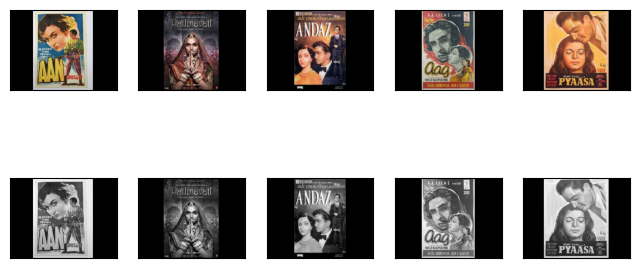

In [7]:
# print images side by side

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for k in range(5):
  plt.subplot(1, 5, k+1)
  plt.imshow(grayscale_images[k], cmap='gray')
  plt.xticks([])
  plt.yticks([])

  plt.subplot(2, 5, k+1)
  plt.imshow(color_images[k])
  plt.xticks([])
  plt.yticks([])


In [8]:
# build model to convert color images to grayscale

from keras import layers

inputs = keras.Input(shape=(150, 200, 3))

x = layers.Conv2D(1, 1, activation='linear', use_bias=False)(inputs)
x = layers.Conv2D(1, 1, activation='linear', use_bias=False)(x)
outputs = layers.Conv2D(1, 1, activation='linear', use_bias=False)(x)

encoder = keras.Model(inputs=inputs, outputs=outputs)
encoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 200, 1)    │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 200, 1)    │             1 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 150, 200, 1)    │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (20.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# train model on color images and corresponding grayscale images as output

encoder.compile(loss='mse', optimizer='adam', metrics=(['accuracy']))
encoder.fit(color_images, grayscale_images, epochs=30, validation_split=0.3)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.4670 - loss: 0.2406 - val_accuracy: 0.4627 - val_loss: 0.2442
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4675 - loss: 0.2168 - val_accuracy: 0.4627 - val_loss: 0.2255
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.4678 - loss: 0.1992 - val_accuracy: 0.4627 - val_loss: 0.2080
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.4698 - loss: 0.1896 - val_accuracy: 0.4627 - val_loss: 0.1917
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.4669 - loss: 0.1705 - val_accuracy: 0.4627 - val_loss: 0.1765
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.4663 - loss: 0.1570 - val_accuracy: 0.4627 - val_loss: 0.1623
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4665 - loss: 0.1460 - val_accuracy: 0.4627 - val_loss: 0.1492
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4698 - loss: 0.1338 - val_accuracy: 0.4627 - val_loss: 0.1372

In [ ]:
!unzip test.zip

In [11]:
from keras.utils import load_img

test_sample = []
n = 10

for k in range(n):
    img_file = "test/" + str(k+1) + ".jpg"
    test_img = load_img(img_file, target_size=(150, 200))
    test_sample.append(test_img)

np.array(test_sample).shape

(10, 150, 200, 3)

In [12]:
y = encoder.predict(np.array(test_sample))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


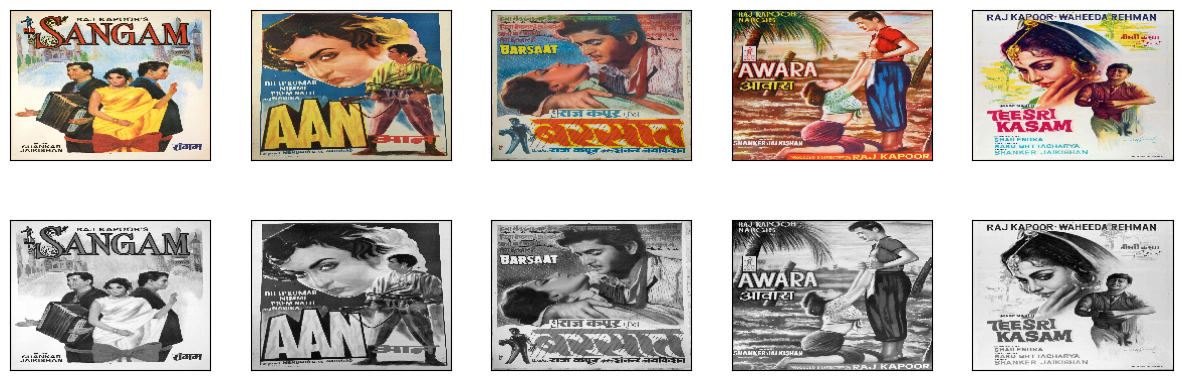

In [13]:
# print output
plt.figure(figsize=(15, 10))

for k in range(5):
  plt.subplot(1, 5, k+1)
  plt.imshow(y[k], cmap='gray')
  plt.xticks([])
  plt.yticks([])

  plt.subplot(2, 5, k+1)
  plt.imshow(test_sample[k])
  plt.xticks([])
  plt.yticks([])